# ORCA QUANTUM CHEMISTRY INTERFACE

ORCA is a computational chemistry software that allows for molecules electronic structure to be solved using gaussian basis functions.

This interface allows you to provide input files for the software ORCA that will then be calculated on a supercomputer and then the output will be provided for visusalisation. 

In order to start you need to prepare an input file. We recommend using the software Avogadro to build the molecule and generate the input file. 

The video below shows you how to build a molecule run ORCA on your computer (this will be done through this interface) and then view the output using the software Avogadro.

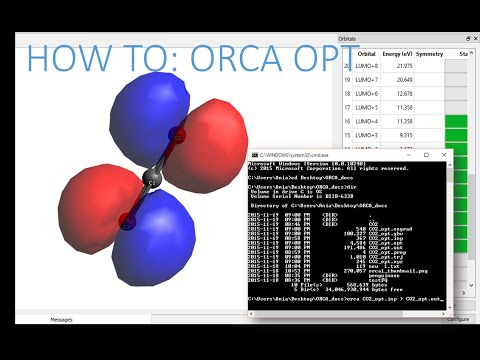

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Y1l1PK45Rsg')

## Upload the file to the server

In [6]:
from ipywidgets import FileUpload, Button, Output, VBox
from IPython.display import display, Markdown, clear_output
upload = FileUpload()

def on_upload_change(change):
    # "linking function with output"
    clear_output()
    with open("input.inp", "w+b") as i:
       i.write(upload.data[0])
    with open('input.inp') as f: 
        for line in f: 
            print(line.strip()) 
            
upload.observe(on_upload_change, names='_counter')
upload

## avogadro generated ORCA input file
# Advanced Mode
#
! B3LYP Opt def2-SVP NormalSCF
!  Normalprint Printbasis PrintMOs

%scf
MaxIter 125
CNVDIIS 1
CNVSOSCF 1
print[p_mos] 1
end

* xyz 0 1
H       -1.83224       -0.10594       -0.00000
H       -0.95903       -0.36738       -0.00000
*



## Run the ORCA job

In [7]:
import subprocess

button = Button(description='Run ORCA Job')
out = Output()
def on_button_clicked(_):
    # "linking function with output"
    with out:
        # what happens when we press the button
        clear_output()
        p = subprocess.Popen([r"C:\Users\JacobLaptop\ORCA\orca.exe","input.inp"], stdout=subprocess.PIPE )
        #p = subprocess.Popen([r"C:\Users\JacobLaptop\ORCA\orca.exe","input.inp"], stdout=subprocess.PIPE )
        print('Job is running please wait for it to complete')
        #stdout = p.communicate()[0].decode("utf-8")
        stdout = str(p.communicate()[0],"utf-8")
        print("Job Finished printing file to jupyter")
        print(stdout)
        print('Writing file to output.out')
        output_file = open("output.out", "w")
        output_file.write(stdout)
        output_file.close()
        
# linking button and function together using a button's method
stdout = button.on_click(on_button_clicked)
# displaying button and its output together
VBox([button,out])

In [8]:
print("Generating download link")
from IPython.display import FileLink, FileLinks

FileLink('output.out')

Generating download link


C:\Users\JacobLaptop\output.out

In [51]:
#https://adreasnow.com/Cheat%20Sheets/Python/Psi4Interactive/
#https://nbviewer.org/github/3dmol/3Dmol.js/blob/master/py3Dmol/examples.ipynb
#https://birdlet.github.io/2019/10/02/py3dmol_example/
import cclib
filename = "output.out"
parser = cclib.io.ccopen(filename)
data = parser.parse()
#print("There are %i atoms and %i MOs" % (data.natom, data.nmo))

data.writexyz("output.xyz")
structure = open("output.xyz")

import py3Dmol
xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(structure.read(),'xyz')
xyzview.setStyle({'stick':{}})
xyzview.setBackgroundColor('0xeeeeee')
xyzview.animate({'loop': 'backAndForth'})
xyzview.zoomTo()
xyzview.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol